## Simple Linear Regression 

Some previous concepts : 
- Regression: is a statistical method used to determine the connection between a dependent variable and one or more independent variables.

In simple words, linear regression, specifically, is a modeling technique where an attempt is made to create a straight line equation on a graph that adequately represents the underlying relationship between the variables. This line should pass through the data points in a way that accurately captures the overall trend, rather than trying to fit every single point exactly.

<img src=".\IMG\sim_lin_reg01.png" width="50%">
<center><figcaption>A simple example of Linear Regression</figcaption></center>

A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term). 

Linear Regression model prediction :   

$$\hat{y} = h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \cdots + \theta_{n}x_{n}$$

In this equation, $\hat{y}$ is the predicted output value, $h_{\theta}(x)$ is the linear regression hypothesis function, $x_{i}$ are the input feature values, and $\theta_{i}$ are the model parameters (also known as weights or coefficients).

This can be written much concisely using a vectorized form :

$$\hat{y} = X\beta$$

where $\hat{y}$ is the predicted output vector, $X$ is the input data matrix, and $\beta$ is the vector of coefficients.






#### How do we train it?
We first need a measure of how well (or poorly) the model best fits the training data. The most common measure of a regression model is the Root Mean Square Error (RMSE)

$$\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$

where $n$ is the number of observations, $y_i$ is the true value of the dependent variable for the $i$-th observation, and $\hat{y}_i$ is the predicted value of the dependent variable for the $i$-th observation.

To train a Linear Regression model, we need to find the value of $\theta$ that minimizes the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE) thatn the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root).

The MSE of a Linear Regression hypothesis $h_{\theta}$ on a training set X is calculated using : 

$$MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y_i})^2$$

where $n$ is the number of observations, $y_i$ is the actual value, and $\hat{y_i}$ is the predicted value.

#### The Normal Ecuation
To fin the value of $\theta$ that minimizes the cost function there is a closed-form solution, in other words, a mathematical equation that gives the result directly. This is called the Normal Equation

$$\hat{\theta} = (X^TX)^{-1}X^Ty$$

where $\theta$ is the vector of coefficients, $X$ is the matrix of feature values, $y$ is the vector of target values. The symbol $^{-1}$ represents the inverse of a matrix.

### Laboratory 
Putting into practice all the given information

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

#### Information about the DataFrame
The objective of this statistical project is to administer three different tests to 50 undergraduate students from UTEC (University of Engineering and Technology) located in Lima, Peru. The first test involves the recall of images displayed on a sheet. The students will have 20 seconds to remember all the animals they can and then list them. The second test involves manipulating three matchsticks to make a fish swim in the opposite direction. The third test involves identifying if a given math problem is correct or incorrect, based on pre-solved examples. Our aim is to compare the results of each test with the GPA of the students, which will allow us to examine the relationship between cognitive abilities and academic performance.

In [2]:
df = pd.read_csv("data_stud_mentalag.csv")
df.head()

,Name,Surname,Test01,Test02,Test03,Age,Level,Degree,Sex,Semester,GPA
0,Francisco,Calle,11,146,5,18,Fácil,Ciencia de la Computación,Masculino,3,15.7
1,Camilo,Soto,3,197,2,18,Intermedio,Ciencia de Datos,Otros,3,11.3
2,Sebástian,Muñico,6,182,6,18,Extremadamente Complejo,Ciencia de Datos,Otros,3,16.2
3,Camila,Niño,9,18,6,18,Intermedio,Ciencia de la Computación,Femenino,2,17.9
4,Jyns,Ordoñez,2,292,7,18,Difícil,Ciencia de Datos,Otros,2,12.8


In [3]:
df.describe() # descriptive exploration on our data

,Test01,Test02,Test03,Age,Semester,GPA
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,7.428571,160.367347,7.265306,18.306122,3.714286,15.649796
std,2.653614,62.427523,2.325363,1.064661,1.457738,1.579932
min,1.000000,18.000000,2.000000,16.000000,1.000000,11.300000
25%,6.000000,107.000000,6.000000,18.000000,3.000000,14.890000
50%,7.000000,154.000000,7.000000,18.000000,4.000000,15.900000
75%,10.000000,201.000000,9.000000,19.000000,5.000000,16.500000
max,12.000000,292.000000,12.000000,21.000000,8.000000,18.710000


In [19]:
ndf = df[['Test01', 'Test02', 'Test03', 'GPA']]
ndf.tail() # the function tail shows the last observations in the data frame

,Test01,Test02,Test03,GPA
44,11,210,12,14.70
45,8,98,6,12.35
46,11,94,10,13.90
47,7,145,8,15.60
48,10,160,9,15.50


As we want to compare the relationship between each test with the GPA of students, we will plot a simple graph to show the ralation beetween this two variables

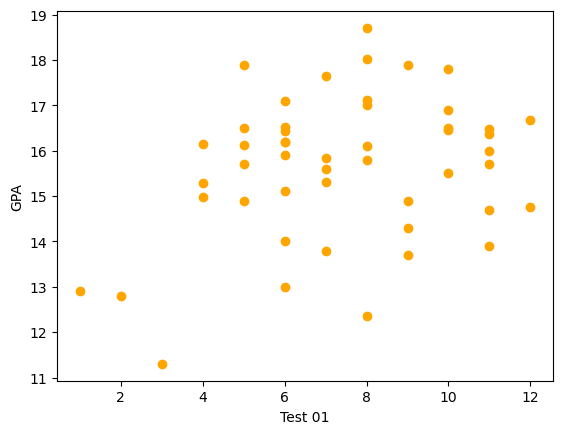

In [5]:
# Plotting Test 01 - GPA
plt.scatter(ndf.Test01, ndf.GPA, color = 'orange')
plt.xlabel("Test 01")
plt.ylabel("GPA")
plt.show()

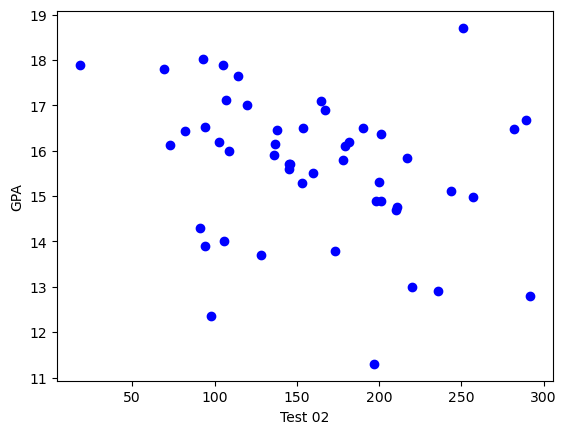

In [6]:
# Plotting Test 02 - GPA
plt.scatter(ndf.Test02, ndf.GPA, color = 'blue')
plt.xlabel("Test 02")
plt.ylabel("GPA")
plt.show()

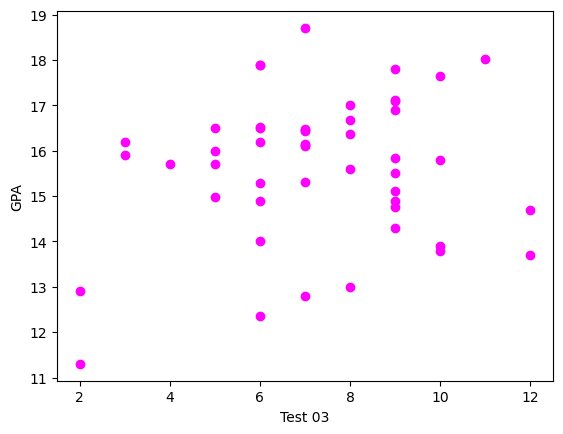

In [7]:
# Plotting Test 03 = GPA
plt.scatter(ndf.Test03, ndf.GPA, color = 'magenta')
plt.xlabel("Test 03")
plt.ylabel("GPA")
plt.show()

Let's compute $\hat{\theta}$ using the normal equation. We will use the inv() function to computer the inverse of a matrix, and the dot() method for matrix multiplication : 

#### Test 01 : 

In [8]:
test_01 = df['Test01'].values.reshape(-1, 1) # converting into two-dimentional array
gpa = df['GPA'].values.reshape(-1, 1)
test01_b = np.c_[np.ones((49,1)), test_01] # add x0 = 1 to each instance
theta_best = np.linalg.inv(test01_b.T.dot(test01_b)).dot(test01_b.T).dot(gpa) # calculating coefficients for the linear regression model
theta_best


array([[14.36135008],
       [ 0.17344463]])

Now we are able to make predictions using $\hat{\theta}$

In [9]:
test01_new = np.array([[0],[2]])
test01_new_b = np.c_[np.ones((2,1)),test01_new] # add x0 = 1 to each instance
gpa_predict = test01_new_b.dot(theta_best)
gpa_predict

array([[14.36135008],
       [14.70823934]])

Let's plot the model prediction 

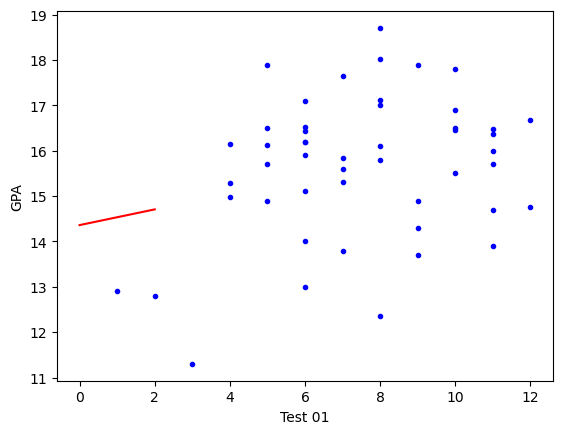

In [28]:
plt.plot(test01_new, gpa_predict, "r-")
plt.plot(test_01, gpa, "b.")
plt.xlabel("Test 01")
plt.ylabel("GPA")
plt.show()

We can perfom all this process using Scikit-Learn

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(test_01, gpa)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(test01_new) # same results

array([[14.36135008],
       [14.70823934]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the
name stands for “least squares”), which you could call directly:

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(test01_b, gpa, rcond=1e-6)
theta_best_svd # same results

array([[14.36135008],
       [ 0.17344463]])

Scikit-Learn separates the bias term (intercept_) from the feature weights (coef_)

#### Evaluation

In [51]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['GPA']])
test_y = np.asanyarray(test[['Test01']])
test_y_= reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )
print("Root Mean Square Error (RMSE): %.2f" % np.sqrt(np.mean((test_y_ - test_y) ** 2)))

Mean absolute error: 9.43
Residual sum of squares (MSE): 94.75
R2-score: -15.12
Root Mean Square Error (RMSE): 9.73


#### Test 02 : 
We'll use the Train/Test Split model to train and test our data
Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [13]:
mask = np.random.rand(len(df)) < 0.8
train = ndf[mask]
test = ndf[~mask]

In [31]:
reg = LinearRegression()
train_x = np.asanyarray(train[["Test02"]])
train_y = np.asanyarray(train[["GPA"]])
reg.fit(train_x,train_y)
# The coefficients
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[-0.00515294]]
Intercept:  [16.6140577]


##### Interpretation 

In [36]:
covariance = ndf['Test02'].cov(ndf['GPA'])
covariance

-26.97054846938773

The covariance is negative, so our results seem to indicate that those with higher GPA tend to take less time to complete the second test.

In [16]:
correlation = ndf['Test02'].corr(ndf['GPA'])
correlation

-0.273448320698698

Since $0 > r > -0.75$ , the linear relationship is weak and negative, confirming the first result.

##### Output

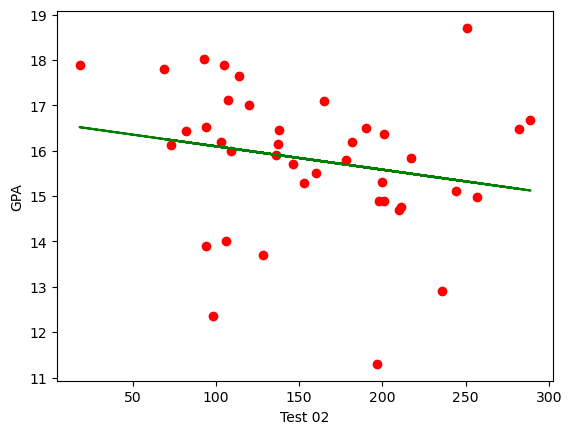

In [37]:
plt.scatter(train.Test02, train.GPA, color = 'red')
plt.xlabel("Test 02")
plt.ylabel("GPA")
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-g')
plt.show()

#### Evaluation

In [50]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['GPA']])
test_y = np.asanyarray(test[['Test02']])
test_y_= reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )
print("Root Mean Square Error (RMSE): %.2f" % np.sqrt(np.mean((test_y_ - test_y) ** 2)))

Mean absolute error: 157.46
Residual sum of squares (MSE): 27581.53
R2-score: -8.90
Root Mean Square Error (RMSE): 166.08


#### Conclusions
Statistical analyses rely on having a representative sample size, and with only 50 participants, the margin of error increases significantly, making it difficult to draw any meaningful conclusions. Additionally, a small sample size can lead to biases and inaccuracies in the data, making it challenging to apply the findings to a larger population.

In conclusion, while the results of the tests may provide some insights, it is essential to recognize the limitations of the sample size and exercise caution when interpreting the results. Future studies should aim to increase the sample size to improve the accuracy and reliability of the findings.

##### References 
- "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems" ~ Aurélien Géron 
- IBM ML0101 (edX)


I would like to express my sincere gratitude to my colleagues, Natalia Falla, Aaron Coorahua, Camila Guevara and Sofía García for working alongside me in collecting the dataset used in this project.